In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
nyc_stations = pd.read_csv('Data/NYC Data/MTA_Subway_Stations_20250124.csv')

In [3]:
nyc_stations.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,N W,Elevated,40.775036,-73.912034,Last Stop,Manhattan,0,0,0,NaN,POINT (-73.912034 40.775036)
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,N W,Elevated,40.770258,-73.917843,Astoria,Manhattan,1,1,1,NaN,POINT (-73.917843 40.770258)
2,R04,3,3,BMT,Astoria,30 Av,Q,False,N W,Elevated,40.766779,-73.921479,Astoria,Manhattan,0,0,0,NaN,POINT (-73.921479 40.766779)
3,R05,4,4,BMT,Astoria,Broadway,Q,False,N W,Elevated,40.761820,-73.925508,Astoria,Manhattan,0,0,0,NaN,POINT (-73.925508 40.76182)
4,R06,5,5,BMT,Astoria,36 Av,Q,False,N W,Elevated,40.756804,-73.929575,Astoria,Manhattan,0,0,0,NaN,POINT (-73.929575 40.756804)


In [4]:
line_list = nyc_stations['Line'].unique()
line_list.sort()
station_list = nyc_stations['Stop Name'].unique()
station_list.sort()

G = nx.Graph()

In [5]:
pd.array(nyc_stations[nyc_stations['Stop Name'] == '14 St']['Line'])

<NumpyExtensionArray>
['8th Av - Fulton St', '6th Av - Culver', 'Broadway - 7Av']
Length: 3, dtype: object

In [6]:
transfer_df = {}

for station in station_list:
    if len(pd.array(nyc_stations[nyc_stations['Stop Name'] == station]['Line'])) > 1:
        transfer_df[station] = []
        transfer_df[station] = pd.array(nyc_stations[nyc_stations['Stop Name'] == station]['Line'])

In [7]:
transfer_df

{'103 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', 'Broadway - 7Av', 'Lexington Av']
 Length: 3, dtype: object,
 '104 St': <NumpyExtensionArray>
 ['Jamaica', 'Liberty Av']
 Length: 2, dtype: object,
 '111 St': <NumpyExtensionArray>
 ['Jamaica', 'Liberty Av', 'Flushing']
 Length: 3, dtype: object,
 '116 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', 'Lexington Av', 'Lenox - White Plains Rd']
 Length: 3, dtype: object,
 '125 St': <NumpyExtensionArray>
 [     '8th Av - Fulton St',          'Broadway - 7Av',
             'Lexington Av', 'Lenox - White Plains Rd']
 Length: 4, dtype: object,
 '135 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', 'Lenox - White Plains Rd']
 Length: 2, dtype: object,
 '14 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', '6th Av - Culver', 'Broadway - 7Av']
 Length: 3, dtype: object,
 '14 St-Union Sq': <NumpyExtensionArray>
 ['Broadway - Brighton', 'Canarsie', 'Lexington Av']
 Length: 3, dtype: object,
 '145 St': <NumpyExtensionArray>
 ['8th Av - 

In [8]:
G.add_nodes_from(line_list)

In [9]:
G.nodes()

NodeView(('4th Av', '63rd St', '6th Av - Culver', '8th Av - Fulton St', 'Astoria', 'Broadway', 'Broadway - 7Av', 'Broadway - Brighton', 'Canarsie', 'Clark St', 'Concourse', 'Crosstown', 'Dyre Av', 'Eastern Pky', 'Flushing', 'Franklin Shuttle', 'Jamaica', 'Jerome Av', 'Lenox - White Plains Rd', 'Lexington - Shuttle', 'Lexington Av', 'Liberty Av', 'Manhattan Bridge', 'Myrtle Av', 'Nostrand', 'Pelham', 'Queens - Archer', 'Queens Blvd', 'Rockaway', 'Sea Beach', 'Sea Beach / West End / Culver / Brighton', 'Second Av', 'Staten Island', 'West End'))

In [10]:
for transfer in transfer_df:
    lines = transfer_df[transfer]
    print(transfer)
    for i in range(len(lines)):
        for j in range(i):
            if i != j:
                G.add_edge(lines[i], lines[j])
                print(f'added edge {lines[i]} to {lines[j]}')
    print()

103 St
added edge Broadway - 7Av to 8th Av - Fulton St
added edge Lexington Av to 8th Av - Fulton St
added edge Lexington Av to Broadway - 7Av

104 St
added edge Liberty Av to Jamaica

111 St
added edge Liberty Av to Jamaica
added edge Flushing to Jamaica
added edge Flushing to Liberty Av

116 St
added edge Lexington Av to 8th Av - Fulton St
added edge Lenox - White Plains Rd to 8th Av - Fulton St
added edge Lenox - White Plains Rd to Lexington Av

125 St
added edge Broadway - 7Av to 8th Av - Fulton St
added edge Lexington Av to 8th Av - Fulton St
added edge Lexington Av to Broadway - 7Av
added edge Lenox - White Plains Rd to 8th Av - Fulton St
added edge Lenox - White Plains Rd to Broadway - 7Av
added edge Lenox - White Plains Rd to Lexington Av

135 St
added edge Lenox - White Plains Rd to 8th Av - Fulton St

14 St
added edge 6th Av - Culver to 8th Av - Fulton St
added edge Broadway - 7Av to 8th Av - Fulton St
added edge Broadway - 7Av to 6th Av - Culver

14 St-Union Sq
added edge Ca

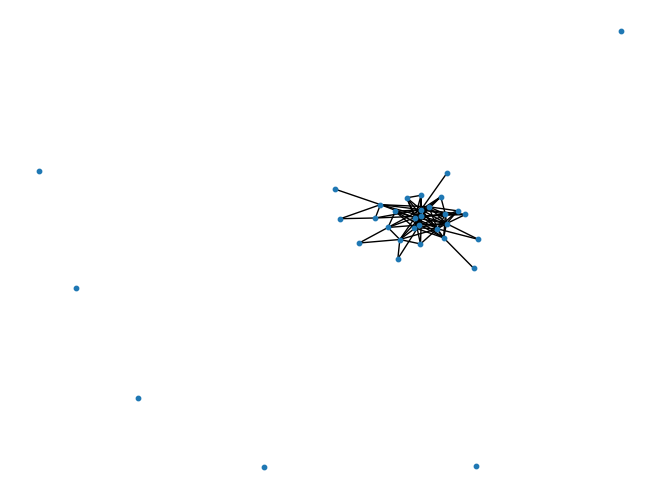

In [11]:
nx.draw(G, with_labels=False, node_size=10)
plt.show()


In [12]:
G.edges('Broadway')

EdgeDataView([('Broadway', 'Manhattan Bridge'), ('Broadway', 'Jamaica'), ('Broadway', '8th Av - Fulton St'), ('Broadway', 'Broadway - 7Av'), ('Broadway', 'Lexington Av')])

In [13]:
adj_net = pd.DataFrame(nx.adjacency_matrix(G))
adj_net.columns = list(G.nodes)
adj_net.index = list(G.nodes)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 34 elements

In [14]:
adj_net

,0
0,"(0, 2)\t1\n (0, 3)\t1\n (0, 6)\t1\n (0, 7..."
1,
2,"(0, 0)\t1\n (0, 3)\t1\n (0, 6)\t1\n (0, 7..."
3,"(0, 0)\t1\n (0, 2)\t1\n (0, 5)\t1\n (0, 6..."
4,"(0, 11)\t1\n (0, 14)\t1"
5,"(0, 3)\t1\n (0, 6)\t1\n (0, 16)\t1\n (0, ..."
6,"(0, 0)\t1\n (0, 2)\t1\n (0, 3)\t1\n (0, 5..."
7,"(0, 0)\t1\n (0, 2)\t1\n (0, 3)\t1\n (0, 6..."
8,"(0, 2)\t1\n (0, 3)\t1\n (0, 7)\t1\n (0, 1..."
9,"(0, 3)\t1\n (0, 11)\t1\n (0, 13)\t1\n (0,..."


In [ ]:
adj_net.to_csv('Data/Master Sets/NYC Master/NYC_Subway_Adjacency_Matrix_by_Line.csv')